## Дисциплина «Основы машинного обучения»
## Рабочая тетрадь № 5

### Теоретический материал – Кластеризация

Кластеризация — разбиение множества объектов на подмножества, 
называемые кластерами. Кластеризация, будучи математическим алгоритм 
имеет широкое применение во многих сферах: начиная с таких естественно 
научных областей как биология и физиология, и заканчивая маркетингом в 
социальных сетях и поисковой оптимизацией. Цель – разделить данные 
таким образом, чтобы точки, находящие в одном и том же кластере, были 
очень схожи друг с другом, а точки, находящиеся в разных кластерах, 
отличались друг от друга. Как и алгоритмы классификации, алгоритмы 
кластеризации присваивают (или прогнозируют) каждой точке данных 
номер кластера, которому она принадлежит.
Задача кластеризации относится к широкому классу задач обучения 
без учителя. Кластеризацию применяют для анализа и поиска признаков по 
которым можно объединить объекты, сжатия данных и поиска новизны (что 
не входит ни в один кластер) В чем отличие классификации и 
кластеризации: при классификации у вас есть набор предопределенных 
классов, вы обучаете ИИ на наборе примеров и потом хотите знать, к какому 
классу принадлежит новый объект. При кластеризации вы используете 
алгоритм, который пытается сгруппировать набор объектов и определить, 
существует ли какая-либо взаимосвязь между объектами.
Метод k-средних
Кластеризация k-средних – один из самых простых и наиболее часто 
используемых алгоритмов кластеризации. Сначала выбирается число 
кластеров k. После выбора значения k алгоритм k-средних отбирает точки, 
которые будут представлять центры кластеров (cluster centers). Затем для 
каждой точки данных вычисляется его евклидово расстояние до каждого 
центра кластера. Каждая точка назначается ближайшему центру кластера. 
Алгоритм вычисляет центроиды (centroids) – центры тяжести кластеров. 
Каждый центроид – это вектор, элементы которого представляют собой 
средние значения характеристик, вычисленные по всем точкам кластера. 
Центр кластера смещается в его центроид. Точки заново назначаются 
ближайшему центру кластера. Этапы изменения центров кластеров и 
переназначения точек итеративно повторяются до тех пор, пока границы 
кластеров и расположение центроидов не перестанут изменяться, т.е. на 
каждой итерации в каждый кластер будут попадать одни и те же точки 
данных.
Алгоритм k-средних, наверное, самый популярный и простой 
алгоритм кластеризации и очень легко представляется в виде простого 
псевдокода:
1. Выбрать количество кластеров k, которое нам кажется 
оптимальным для наших данных.
2. Высыпать случайным образом в пространство наших данных k 
точек (центроидов).
3. Для каждой точки нашего набора данных посчитать, к какому 
центроиду она ближе.
4. Переместить каждый центроид в центр выборки, которую мы 
отнесли к этому центроиду.
5. Повторять последние два шага фиксированное число раз, либо 
до тех пор пока центроиды не "сойдутся" (обычно это значит, что их 
смещение относительно предыдущего положения не превышает какого-то 
заранее заданного небольшого значения).
Стоит заметить, что можно рассчитывать расстояние между 
центройдами по любой метрике (Евклидовой, Хемминговой и т.д.).

Сгенерируем 2D-набор данных, содержащий 4 разных больших объекта, 
а затем применим алгоритм k-средних, чтобы увидеть результат

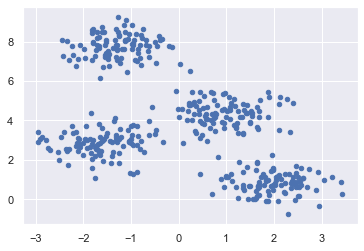

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,y_true=make_blobs(n_samples=400,centers=4,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0],X[:,1],s=20);
plt.show()

In [2]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

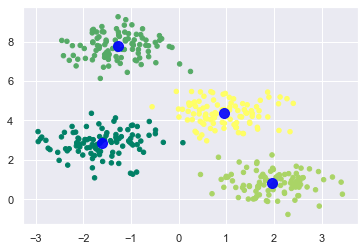

In [3]:
X,y_true=make_blobs(n_samples=400,centers=4,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=20,cmap='summer')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='blue',s=100,alpha=0.9);
plt.show()

## 1.1.1 Пример

### Задача:

Проведем кластеризацию K-средних к набору простых цифр. K-means 
попытается идентифицировать похожие цифры

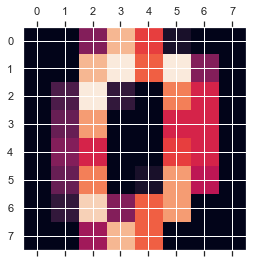

In [4]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape
import matplotlib.pyplot as plt 
plt.matshow(digits.images[0]) 
plt.show() 

In [5]:
kmeans=KMeans(n_clusters=10,random_state=0)
clusters=kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

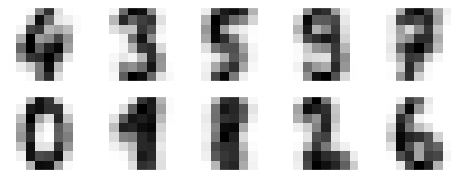

In [6]:
fig,ax=plt.subplots(2,5,figsize=(8,3))
centers=kmeans.cluster_centers_.reshape(10,8,8)
for axi,center in zip(ax.flat,centers):
    axi.set(xticks=[],yticks=[])
    axi.imshow(center,interpolation='nearest',cmap=plt.cm.binary)

### Задание:

Дан массив данных
𝑋𝑋 = 𝑛𝑛𝑛𝑛. 𝑎𝑎𝑎𝑎𝑎𝑎𝑎𝑎𝑎𝑎([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91],])
Требуется провести кластерный анализ данных методом k-средних. 
Поэкспериментируйте с количеством кластеров.

### Решение:

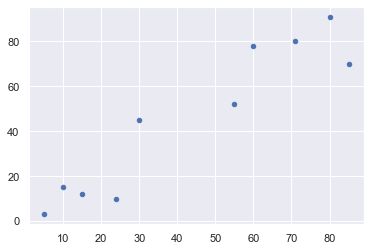

In [7]:
X=np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91],])
plt.scatter(X[:,0],X[:,1],s=20);
plt.show()

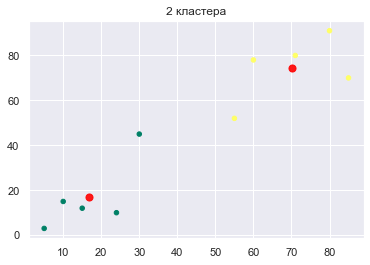

In [8]:
plt.title('2 кластера')
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=20,cmap='summer')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=50,alpha=0.9);
plt.show()

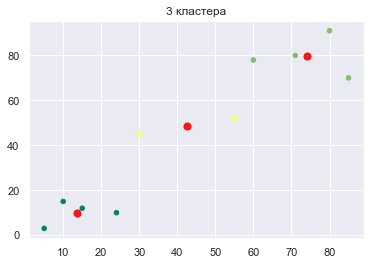

In [9]:
plt.title('3 кластера')
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=20,cmap='summer')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=50,alpha=0.9);
plt.show()

### Задание:

Выполните кластеризацию для набора данных ирисов Фишера. Выполните 
предсказания для модели. Поэкспериментируйте с количеством кластеров.

### Решение:

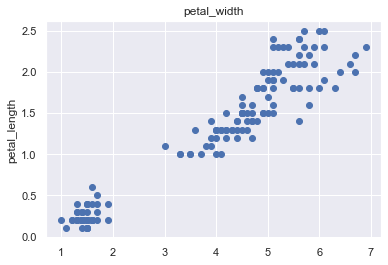

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
mas=[]
data = pd.read_csv('iris1.csv')
plt.scatter(data['petal_length'],data['petal_width'])
# x это ширина листка ,y это длина листка
plt.ylabel('petal_length')
plt.title('petal_width')
plt.show()
for i in range (len(data)):
    s=np.vstack([data['petal_length'][i],data['petal_width'][i]])
    mas.append(s.flatten())
mas=np.array(mas)

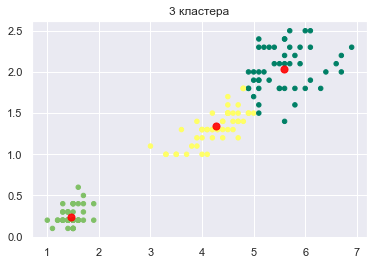

In [11]:
plt.title('3 кластера')
kmeans=KMeans(n_clusters=3)
kmeans.fit(mas)
y_kmeans=kmeans.predict(mas)
plt.scatter(mas[:,0],mas[:,1],c=y_kmeans,s=20,cmap='summer')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=50,alpha=0.9);
plt.show()

Введите длину листка: 6
Введите ширину листка: 1.5
[5.8 1.6] [6.  1.8] [5.8 1.8]
K-Ближайших предсказывает: virginica
Кластор предсказывает: virginica


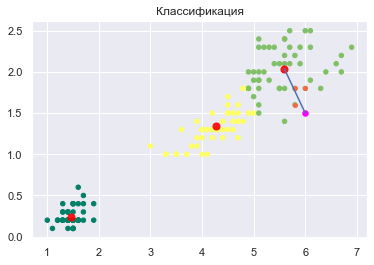

In [115]:
num1 = float(input("Введите длину листка: "))
num2 = float(input("Введите ширину листка: "))
num = [num1, num2]
plt.title('Классификация')
kmeans=KMeans(n_clusters=3)
kmeans.fit(mas)
y_kmeans=kmeans.predict(mas)
plt.scatter(mas[:,0],mas[:,1],c=y_kmeans,s=20,cmap='summer')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=50,alpha=0.9);
# цвета https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
k=0
minx=1000
miny=1000
sosedi=[-1,-1,-1]
while k!=3:
    for dl in range(len(mas)):
        if (minx-num1)**2+(miny-num2)**2>(mas[dl][0]-num1)**2 +(mas[dl][1]-num2)**2 and sosedi[0]!=dl and sosedi[1]!=dl:
            minx=mas[dl][0]
            miny=mas[dl][1]
            sosedi[k]=dl
    minx=1000
    miny=1000
    k+=1
print(mas[sosedi[0]],mas[sosedi[1]],mas[sosedi[2]])
if sum(sosedi)<154:
    print('K-Ближайших предсказывает: setosa')
elif sum(sosedi)<304:
    print('K-Ближайших предсказывает: versicolor')
else:
    print('K-Ближайших предсказывает: virginica')
clust=[[0,0],[0,0],[0,0]]
while sum(clust[2])==0:
    for x in range(len(centers)):
        if sum(centers[x])<2:
            clust[0]=centers[x]
        elif sum(centers[x])<6:
            clust[1]=centers[x]
        elif sum(centers[x])>6:
            clust[2]=centers[x]
if (clust[0][0]-num1)**2+(clust[0][1]-num2)**2<(clust[1][0]-num1)**2+(clust[1][1]-num2)**2 and (clust[0][0]-num1)**2+(clust[0][1]-num2)**2<(clust[2][0]-num1)**2+(clust[2][1]-num2)**2:
    print('Кластор предсказывает: setosa')
if (clust[1][0]-num1)**2+(clust[1][1]-num2)**2<(clust[0][0]-num1)**2+(clust[0][1]-num2)**2 and (clust[1][0]-num1)**2+(clust[1][1]-num2)**2<(clust[2][0]-num1)**2+(clust[2][1]-num2)**2:
    print('Кластор предсказывает: versicolor')
    clust[0]=clust[1]
if (clust[2][0]-num1)**2+(clust[2][1]-num2)**2<(clust[1][0]-num1)**2+(clust[1][1]-num2)**2 and (clust[2][0]-num1)**2+(clust[2][1]-num2)**2<(clust[0][0]-num1)**2+(clust[0][1]-num2)**2:
    print('Кластор предсказывает: virginica')
    clust[0]=clust[2]
plt.scatter(mas[sosedi[0]][0],mas[sosedi[0]][1],c='tomato',s=15)
plt.scatter(mas[sosedi[1]][0],mas[sosedi[1]][1],c='tomato',s=15)
plt.scatter(mas[sosedi[2]][0],mas[sosedi[2]][1],c='tomato',s=15)
plt.scatter(num1,num2,c='fuchsia',s=30)
plt.plot([clust[0][0],num1], [clust[0][1],num2])
plt.show()

### Теоретический материал – Иерархическая кластеризация

Алгомеративная кластеризация относится к семейству алгоритмов кластеризации, в основе которых лежат одинаковые принципы: алгоритм начинает свою работу с того, что каждую точку данных заносит в свой собственный кластер и по мере выполнения объединяет два наиболее схожих между собой кластера до тех пор, пока не будет удовлетворен определенный критерий остановки. Зачастую данным критерием выступает это количество кластеров, поэтому схожие между собой кластеры объединяются до тех пор, пока не останется заданное число кластеров.
Результатом агломеративной кластеризации является иерархическая кластеризация. Кластеризация выполняется итеративно, и каждая точка совершает путь от отдельной точки-кластера до участника итогового кластера. На каждом промежуточном шаге происходит кластеризация данных (с разным количеством кластеров). Иногда полезно сразу взглянуть на все возможные кластеризации. Следующий пример показывает наложение всех возможных кластеризаций, показанных на рис. и дает некоторое представление о том, как каждый кластер распадается на более мелкие кластеры.

### 1.1.2 Пример

Построить дендрограмму для заданного массива данных.

### Решение:

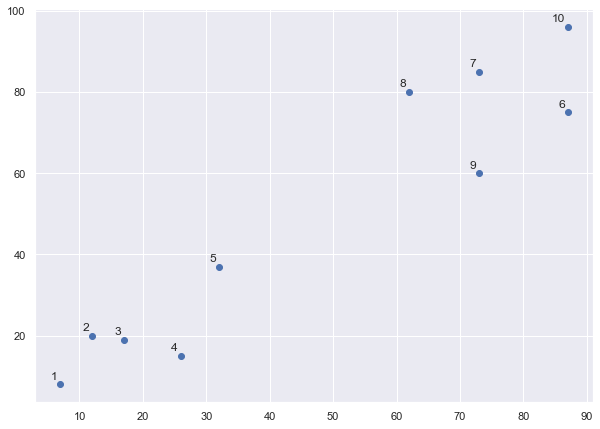

In [13]:
import matplotlib.pyplot as plt
import numpy as np
X=np.array([[7,8],[12,20],[17,19],[26,15],[32,37],[87,75],[73,85],[62,80],[73,60],[87,96]])
labels=range(1,11)
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1],label='True Position')
for label, x, y in zip(labels,X[:,0],X[:,1]):
    plt.annotate(
        label,xy=(x,y),xytext=(-3,3),textcoords='offset points',ha='right',va='bottom')
plt.show()

Далее построим дендрограмму для точек данных с помощью библиотеки Scipy

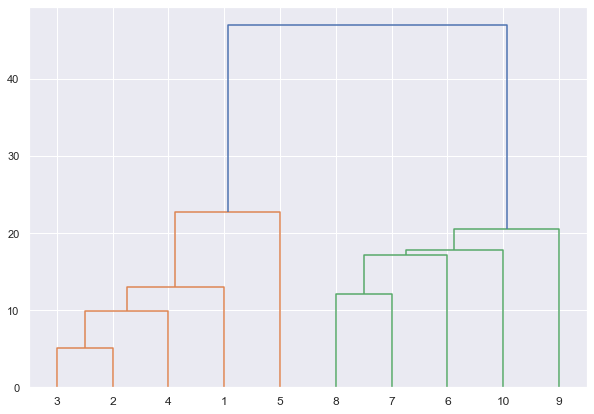

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked=linkage(X,'single')
labelList=range(1,11)
plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',labels=labelList,
         distance_sort='descending',show_leaf_counts=True)
plt.show()

Далее нам нужно импортировать класс для кластеризации и вызвать его метод fit_predict для прогнозирования кластера.

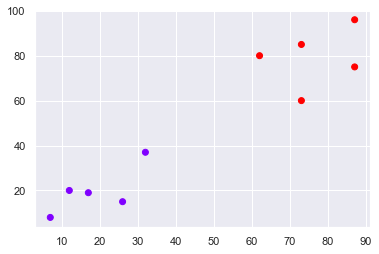

In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=cluster.labels_,cmap='rainbow')

### Пример:

В этом примере мы выполним иерархическую кластеризацию реальных данных и посмотрим, как ее можно использовать для решения реальной проблемы. Выполним кластеризацию данных по набору https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv
Задача, которую мы собираемся решить в этом разделе, состоит в том, чтобы разделить клиентов на разные группы в зависимости от их покупательских тенденций.

In [16]:
url='https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv '
customer_data=pd.read_csv(url)
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Наш набор данных состоит из пяти столбцов. Чтобы просмотреть результаты в двумерном пространстве, мы сохраним только два из них:«Годовой доход» (в тысячах долларов) и «Оценка расходов» (1–100). Столбец «Оценка расходов» показывает, как часто человек тратит деньги в торговом центре по шкале от 1 до 100, где 100 — это самый высокий расход. Выполним следующий скрипт, чтобы отфильтровать первые три столбца из нашего набора данных:

In [17]:
data=customer_data.iloc[:,3:5].values

Далее нам нужно знать кластеры, на которые мы хотим разделить наши данные. Мы снова будем использовать библиотеку scipy для создания дендрограммы:

<Figure size 5040x2160 with 0 Axes>

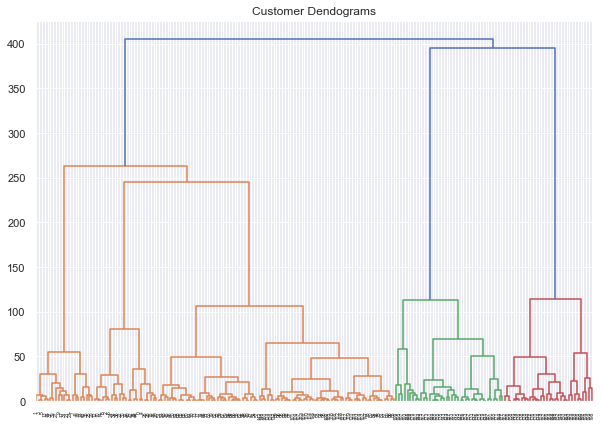

In [18]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28,12),dpi=180)
plt.figure(figsize=(10,7))
plt.title('Customer Dendograms')
dend=shc.dendrogram(shc.linkage(data,method='ward'))

Если мы нарисуем горизонтальную линию, которая проходит через самое длинное расстояние без горизонтальной линии, мы получим 5 кластеров. Теперь мы знаем количество кластеров для нашего набора данных, следующим шагом будет группировка точек данных в эти пять кластеров.
Для этого мы снова воспользуемся классом AgglomerativeClustering библиотеки sklearn.cluster

In [19]:
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

В качестве последнего шага давайте построим кластеры, чтобы увидеть, как на самом деле были сгруппированы наши данные:

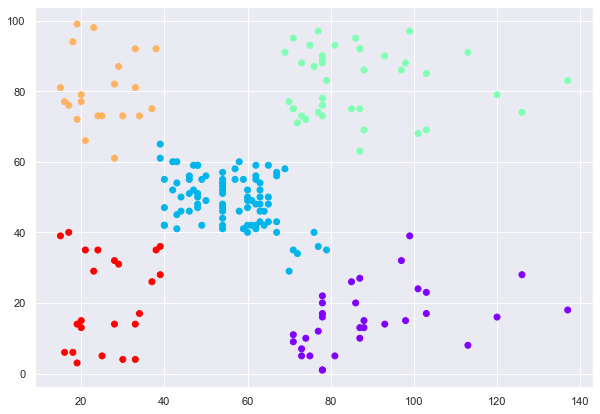

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1],c=cluster.labels_,cmap='rainbow')

### Задача:

Задание. Выполните иерархическую кластеризацию для набора данных об ирисах Фишера. При этом необходимо использовать любые два признака (всего их четыре).

### Решение:

<Figure size 5040x2160 with 0 Axes>

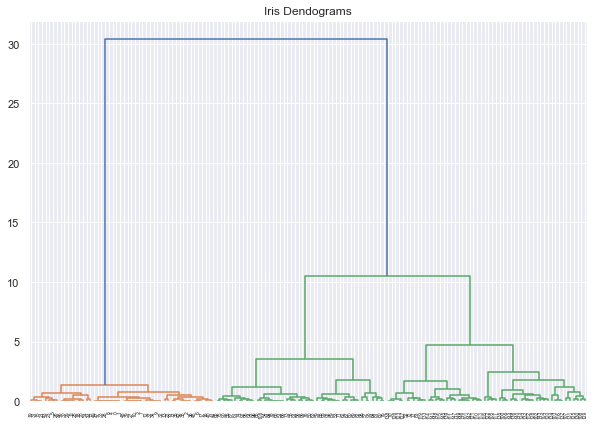

In [32]:
data1 = pd.read_csv('iris1.csv')
data=data1.iloc[:,2:4].values
plt.figure(figsize=(28,12),dpi=180)
plt.figure(figsize=(10,7))
plt.title('Iris Dendograms')
dend=shc.dendrogram(shc.linkage(data,method='ward'))
plt.show()

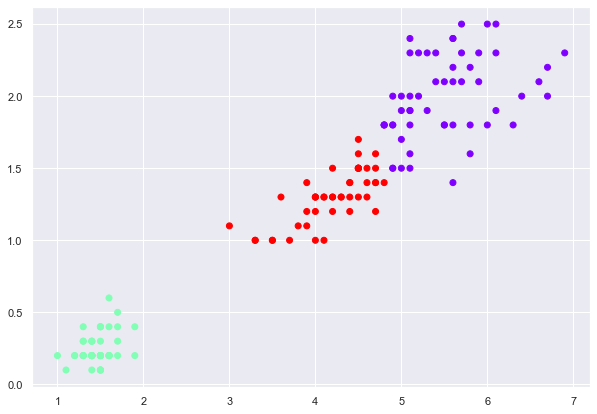

In [31]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(data)
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1],c=cluster.labels_,cmap='rainbow')
plt.show()